In [1]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
train_path="data/classification/train"
test_path="data/classification/test"
val_path="data/classification/valid"

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [4]:
train_generator = train_datagen.flow_from_directory(train_path, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(val_path, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
test_generator = test_datagen.flow_from_directory(test_path, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 160 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications.xception import Xception
base_model = Xception(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
import tensorflow as tf
# Freeze last 5 layers
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [7]:
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation="softmax")(x)
model = Model(base_model.input, predictions)


mc = ModelCheckpoint('model/Xception_model.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.compile(optimizer = RMSprop(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [8]:
xception_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 25, callbacks=[mc])

Epoch 1/25
  1/100 [..............................] - ETA: 3:05 - loss: 1.8113 - acc: 0.5500
Epoch 00001: val_loss improved from inf to 1.81127, saving model to model/Xception_model.hdf5
100/100 [==============================] - 290s 3s/step - loss: 1.0617 - acc: 0.7230 - val_loss: 1.8113 - val_acc: 0.5500
Epoch 2/25
  1/100 [..............................] - ETA: 2:57 - loss: 1.3316 - acc: 0.6000
Epoch 00002: val_loss improved from 1.81127 to 1.33159, saving model to model/Xception_model.hdf5
100/100 [==============================] - 275s 3s/step - loss: 0.6843 - acc: 0.7920 - val_loss: 1.3316 - val_acc: 0.6000
Epoch 3/25
  1/100 [..............................] - ETA: 2:42 - loss: 2.2955 - acc: 0.6000
Epoch 00003: val_loss did not improve from 1.33159
100/100 [==============================] - 269s 3s/step - loss: 0.6344 - acc: 0.8140 - val_loss: 2.2955 - val_acc: 0.6000
Epoch 4/25
  1/100 [..............................] - ETA: 2:37 - loss: 2.7318 - acc: 0.5500
Epoch 00004: val_lo

  1/100 [..............................] - ETA: 2:31 - loss: 1.6805 - acc: 0.8000
Epoch 00023: val_loss did not improve from 0.73763
100/100 [==============================] - 285s 3s/step - loss: 0.2707 - acc: 0.9310 - val_loss: 1.6805 - val_acc: 0.8000
Epoch 24/25
  1/100 [..............................] - ETA: 2:43 - loss: 3.2968 - acc: 0.8000
Epoch 00024: val_loss did not improve from 0.73763
100/100 [==============================] - 273s 3s/step - loss: 0.2591 - acc: 0.9315 - val_loss: 3.2968 - val_acc: 0.8000
Epoch 25/25
  1/100 [..............................] - ETA: 2:15 - loss: 2.6309 - acc: 0.8000
Epoch 00025: val_loss did not improve from 0.73763
100/100 [==============================] - 267s 3s/step - loss: 0.2143 - acc: 0.9395 - val_loss: 2.6309 - val_acc: 0.8000


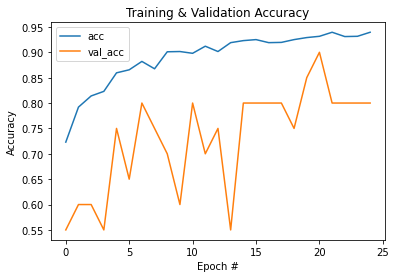

In [9]:
import matplotlib.pyplot as plt
# plot training history
plt.figure()
plt.plot(xception_history.history['acc'], label='acc')
plt.plot(xception_history.history['val_acc'], label='val_acc')

plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("plot/Xception_model_A.png")
plt.show()

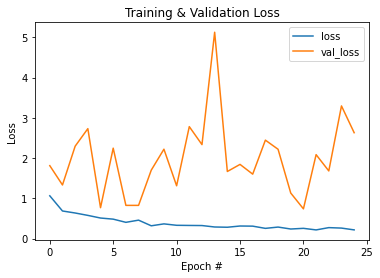

In [10]:
import matplotlib.pyplot as plt
# plot training history
plt.figure()
plt.plot(xception_history.history['loss'], label='loss')
plt.plot(xception_history.history['val_loss'], label='val_loss')

plt.title("Training & Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("plot/Xception_model_L.png")
plt.show()

In [12]:
from tensorflow.keras.models import load_model
model1 = load_model('model/Xception_model.hdf5')
model1.evaluate_generator(test_generator)

[4.36529016494751, 0.8]